In [8]:
!pip install mplfinance
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=7f8d2be0afca9d40de17be48107fd6e16c6b229842f67917cb7e8fc02923fe0b
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [9]:
import mplfinance as mpf
import ta

In [10]:
symbol = 'AAPL'
country = 'EN'

### Yahoo

In [12]:
import yfinance as yf

In [13]:
country_symbol = '.TW' if country == 'TW' else ''
yahoo_data = yf.download(f'{symbol}{country_symbol}', period='1y')

# Generate multiple SMAs
yahoo_data['SMA_20'] = ta.trend.sma_indicator(yahoo_data['Close'], window=20)
yahoo_data['SMA_50'] = ta.trend.sma_indicator(yahoo_data['Close'], window=50)
yahoo_data['SMA_100'] = ta.trend.sma_indicator(yahoo_data['Close'], window=100)

yahoo_data['MACD'] = ta.trend.macd(yahoo_data['Close'])
yahoo_data['MACD_Signal'] = ta.trend.macd_signal(yahoo_data['Close'])

yahoo_data['RSI'] = ta.momentum.rsi(yahoo_data['Close'], window=14)

yahoo_data = yahoo_data.dropna()
yahoo_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,SMA_100,MACD,MACD_Signal,RSI
Date,,,,,,,,,,,,
2024-02-21,181.940002,182.889999,180.660004,182.320007,181.862549,41529700,187.395999,189.407200,185.1912,-1.750042,-1.059673,37.741496
2024-02-22,183.479996,184.960007,182.460007,184.369995,183.907394,52292200,186.889499,189.180399,185.3280,-1.666810,-1.181100,44.058402
2024-02-23,185.009995,185.039993,182.229996,182.520004,182.062042,45119700,186.306999,188.967200,185.4411,-1.730182,-1.290917,40.103871
2024-02-26,182.240005,182.759995,180.649994,181.160004,180.705460,40867400,185.743999,188.696200,185.5152,-1.868606,-1.406454,37.443187
2024-02-27,181.100006,183.919998,179.559998,182.630005,182.171768,54318900,185.289000,188.389600,185.6175,-1.838497,-1.492863,41.927930
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,227.339996,229.449997,225.809998,226.470001,226.470001,54146000,223.680001,222.356401,211.6761,0.730428,0.305406,56.017060
2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100,223.689501,222.215801,212.2568,0.973629,0.439051,57.294587
2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700,223.606501,222.046801,212.7902,1.073304,0.565901,55.370138


### K line

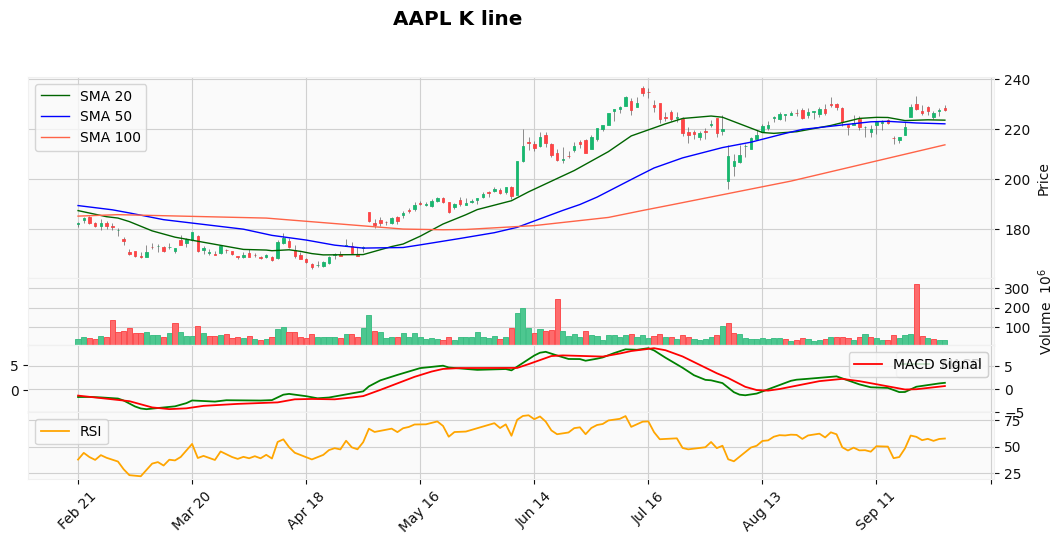

In [14]:
apds = [
    mpf.make_addplot(yahoo_data['SMA_20'], color='darkgreen', width=1.0, label='SMA 20'),
    mpf.make_addplot(yahoo_data['SMA_50'], color='blue', width=1.0, label='SMA 50'),
    mpf.make_addplot(yahoo_data['SMA_100'], color='tomato', width=1.0, label='SMA 100'),
    mpf.make_addplot(yahoo_data['MACD'], panel=2, color='green', label='MACD'),
    mpf.make_addplot(yahoo_data['MACD_Signal'], panel=2, color='red', label='MACD Signal'),
    mpf.make_addplot(yahoo_data['RSI'], panel=3, color='orange', label='RSI')
]

mpf.plot(yahoo_data, type='candle', style='yahoo', volume=True, figratio=(21, 9), title=f'{symbol} K line',
         addplot=apds, panel_ratios=(6, 2, 2, 2))
# add legend

### Predict with MACD, RSI, SMA

### Data Preprocessing

In [15]:
full_data = yahoo_data.copy()

full_data['MACD_diff'] = full_data['MACD'] - full_data['MACD_Signal']
full_data['RSI'] = full_data['RSI'] / 100

In [16]:
full_X = full_data[['MACD_diff', 'RSI', 'SMA_20', 'SMA_50', 'SMA_100', 'Close']]
full_y = full_data['Close'].shift(-1)

# predict next N days
predict_days = 60
train_X = full_X[:-predict_days]
train_y = full_y[:-predict_days]

test_X = full_X[-predict_days:]
test_y = full_y[-predict_days:]

train_X

,MACD_diff,RSI,SMA_20,SMA_50,SMA_100,Close
Date,,,,,,
2024-02-21,-0.690370,0.377415,187.395999,189.407200,185.1912,182.320007
2024-02-22,-0.485710,0.440584,186.889499,189.180399,185.3280,184.369995
2024-02-23,-0.439266,0.401039,186.306999,188.967200,185.4411,182.520004
2024-02-26,-0.462151,0.374432,185.743999,188.696200,185.5152,181.160004
2024-02-27,-0.345634,0.419279,185.289000,188.389600,185.6175,182.630005
...,...,...,...,...,...,...
2024-06-27,-0.169088,0.681353,204.596000,189.829800,183.1470,214.100006
2024-06-28,-0.424983,0.616635,205.562500,190.682200,183.3764,210.619995
2024-07-01,-0.232324,0.675165,206.787500,191.676400,183.6509,216.750000


In [17]:
train_y

,Close
Date,
2024-02-21,184.369995
2024-02-22,182.520004
2024-02-23,181.160004
2024-02-26,182.630005
2024-02-27,181.419998
...,...
2024-06-27,210.619995
2024-06-28,216.750000
2024-07-01,220.270004


### Start Predict

In [18]:
def show_predict_result(predict_y, true_y):
    import matplotlib.pyplot as plt
    plt.plot(predict_y, label='Predict')
    plt.plot(true_y.values, label='True')
    plt.legend()
    plt.show()

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

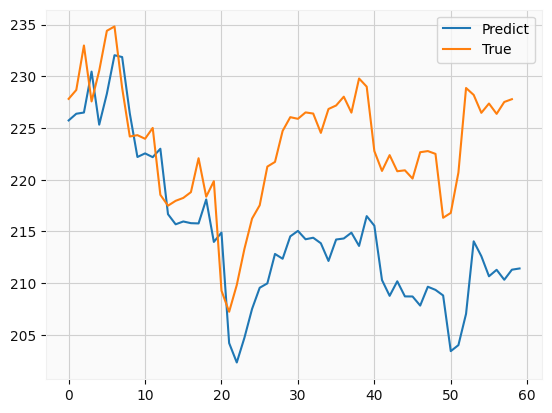

In [20]:
lr = LinearRegression()
lr.fit(train_X, train_y)
lr.score(train_X, train_y)
show_predict_result(lr.predict(test_X), test_y)

### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

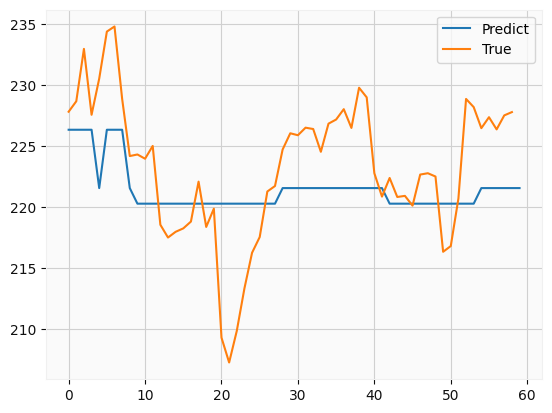

In [22]:
dt = DecisionTreeRegressor()
dt.fit(train_X, train_y)
dt.score(train_X, train_y)
show_predict_result(dt.predict(test_X), test_y)

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

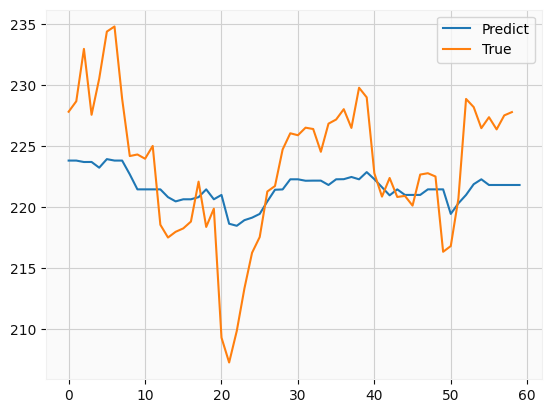

In [24]:
rf = RandomForestRegressor()
rf.fit(train_X, train_y)
rf.score(train_X, train_y)
show_predict_result(rf.predict(test_X), test_y)